In [38]:
import tensorflow as tf 
import matplotlib.pyplot as plt 

path ='./data/c3.jpg'

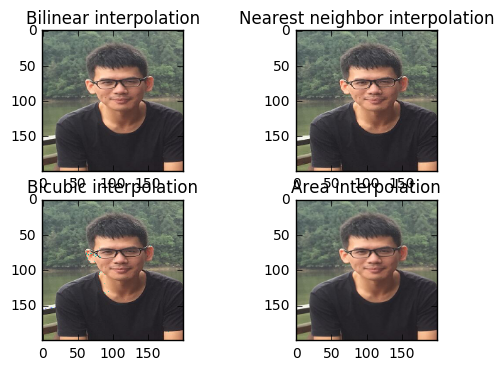

In [60]:
with tf.Session() as sess:
    #图片读取方法
    #1、把图片看做一个图片直接读进来，获取图片的原始数据，再进行解码
    #主要用到的函数就是tf.gfile.FastFile,tf.image.decode_jpeg
    image_raw_data_jpg = tf.gfile.FastGFile(path,'rb').read() 
    img_data_jpg = tf.image.decode_png(image_raw_data_jpg)
    img_data_jpg = tf.image.convert_image_dtype(img_data_jpg,dtype=tf.float32)  #图片归一化处理
    resized_image1 = tf.image.resize_images(img_data_jpg,[200,200]) #图片缩放
    resized_image2 = tf.image.resize_images(img_data_jpg,[200,200],1)
    resized_image3 = tf.image.resize_images(img_data_jpg,[200,200],2)
    resized_image4 = tf.image.resize_images(img_data_jpg,[200,200],3) 
    result = sess.run(img_data_jpg)
    result1 = resized_image2.eval()
    plt.figure() 
    
    plt.subplot(221)
    plt.imshow(resized_image1.eval())
    plt.imshow(sess.run(resized_image1))
    plt.title('Bilinear interpolation')
    plt.subplot(222)
    plt.imshow(resized_image2.eval())
    plt.title('Nearest neighbor interpolation')
    plt.subplot(223)
    plt.imshow(resized_image3.eval())
    plt.title('Bicubic interpolation')
    plt.subplot(224)
    plt.imshow(resized_image4.eval())
    plt.title('Area interpolation')
    plt.show() 

In [40]:
#图片归一化tf.image.convert_image_dtype 
import tensorflow as tf 
import cv2 

data = cv2.imread(path)
print(data.shape)
#print(data)
img = tf.image.convert_image_dtype(data,tf.float32) #图片归一化，[0,1],浮点类型数据

init = tf.global_variables_initializer() 
with tf.Session() as sess:
    sess.run(init)
    img = sess.run(img)
    print(img.shape)
    #print(img)

(428, 324, 3)
(428, 324, 3)


In [42]:
#图片缩放 tf.image.resize_images 
import tensorflow as tf 
import cv2 
import numpy as np 
img = cv2.imread(path)
print(data.shape)
img = tf.image.resize_images(img,size=[856,648])
img = tf.cast(img,tf.uint8)
init = tf.global_variables_initializer() 
sess = tf.Session() 
sess.run(init)
img =sess.run(img)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows() 

(428, 324, 3)


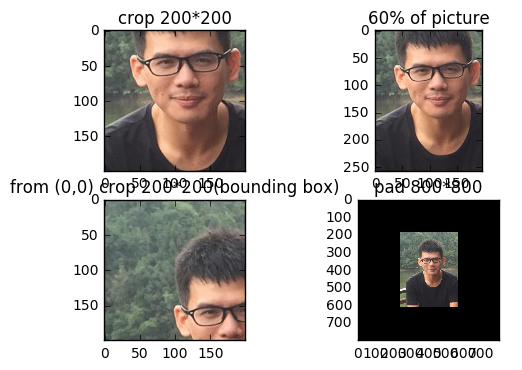

In [62]:
import tensorflow as tf 
import matplotlib.pyplot as plt 

path ='./data/c3.jpg' 
with tf.Session() as sess:
    #读取图片
    image_raw_data_jpg = tf.gfile.FastGFile(path,'rb').read() 
    img_data_jpg = tf.image.decode_png(image_raw_data_jpg)
    #数据归一化
    img_data_jpg = tf.image.convert_image_dtype(img_data_jpg,dtype=tf.float32)
    
    resized_image1 = tf.image.resize_image_with_crop_or_pad(img_data_jpg,200,200)
    resized_image2 = tf.image.central_crop(img_data_jpg,0.6)
    resized_image3 = tf.image.crop_to_bounding_box(img_data_jpg,0,0,200,200)
    resized_image4 = tf.image.resize_image_with_crop_or_pad(img_data_jpg,800,800)
    
    plt.figure() 
    plt.subplot(221)
    plt.imshow(resized_image1.eval())
    plt.title('crop 200*200')
    plt.subplot(222)
    plt.imshow(resized_image2.eval())
    plt.title('60% of picture')
    plt.subplot(223)
    plt.imshow(resized_image3.eval())
    plt.title('from (0,0) crop 200*200(bounding box)')
    plt.subplot(224)
    plt.imshow(resized_image4.eval())
    plt.title('pad 800*800')
    plt.show()
    

In [64]:
#tensorflow 读取图片的方法
#1、第一种就是把图片看做是一个图片直接读进来，获取图片的原始数据，再进行解码
#2、第二种就是把图片看成一个文件，用队列的方式读取
import tensorflow as tf 
path ='./data/c3.jpg' 

#第一种方法：
image_raw_data = tf.gfile.FastGFile(path,'rb').read()  #获取图片的原始数据
image = tf.image.decode_jpeg(image_raw_data)  #图片解码
sess = tf.Session()
print(sess.run(image))

#第二种方法:
file_queue = tf.train.string_input_producer([path]) #创建输入队列
image_reader = tf.WholeFileReader() 
_,image = image_reader.read(file_queue)
image =tf.image.decode_jpeg(image)

with tf.Session() as sess:
    coord = tf.train.Coordinator() #协同启动的线程
    threads = tf.train.start_queue_runners(sess=sess,coord=coord) #启动线程运行队列
    print(sess.run(image))
    coord.request_stop() #停止所有的线程
    coord.join(threads) 

[[[109 126 118]
  [118 135 127]
  [124 141 133]
  ..., 
  [132 150 126]
  [136 154 130]
  [138 156 132]]

 [[112 129 121]
  [120 137 129]
  [126 143 135]
  ..., 
  [133 151 129]
  [137 155 133]
  [139 157 135]]

 [[113 130 122]
  [121 138 130]
  [126 143 135]
  ..., 
  [129 147 125]
  [132 150 128]
  [134 152 130]]

 ..., 
 [[138 148  96]
  [138 148  96]
  [139 149  97]
  ..., 
  [150 102  80]
  [140  92  72]
  [130  83  65]]

 [[138 148  96]
  [138 148  96]
  [139 149  97]
  ..., 
  [150 102  82]
  [138  91  71]
  [129  82  64]]

 [[139 149  97]
  [139 149  97]
  [139 149  97]
  ..., 
  [150 102  82]
  [136  89  71]
  [127  81  65]]]
[[[109 126 118]
  [118 135 127]
  [124 141 133]
  ..., 
  [132 150 126]
  [136 154 130]
  [138 156 132]]

 [[112 129 121]
  [120 137 129]
  [126 143 135]
  ..., 
  [133 151 129]
  [137 155 133]
  [139 157 135]]

 [[113 130 122]
  [121 138 130]
  [126 143 135]
  ..., 
  [129 147 125]
  [132 150 128]
  [134 152 130]]

 ..., 
 [[138 148  96]
  [138 148  96]


In [55]:
result1.shape

(200, 200, 3)

In [56]:
result

array([[[ 0.42745101,  0.49411768,  0.46274513],
        [ 0.46274513,  0.52941179,  0.49803925],
        [ 0.48627454,  0.5529412 ,  0.52156866],
        ..., 
        [ 0.51764709,  0.58823532,  0.49411768],
        [ 0.53333336,  0.60392159,  0.50980395],
        [ 0.5411765 ,  0.61176473,  0.51764709]],

       [[ 0.43921572,  0.50588238,  0.47450984],
        [ 0.47058827,  0.53725493,  0.50588238],
        [ 0.49411768,  0.56078434,  0.52941179],
        ..., 
        [ 0.52156866,  0.59215689,  0.50588238],
        [ 0.53725493,  0.60784316,  0.52156866],
        [ 0.54509807,  0.6156863 ,  0.52941179]],

       [[ 0.44313729,  0.50980395,  0.4784314 ],
        [ 0.47450984,  0.5411765 ,  0.50980395],
        [ 0.49411768,  0.56078434,  0.52941179],
        ..., 
        [ 0.50588238,  0.57647061,  0.49019611],
        [ 0.51764709,  0.58823532,  0.50196081],
        [ 0.52549022,  0.59607846,  0.50980395]],

       ..., 
       [[ 0.5411765 ,  0.58039218,  0.37647063],
        

In [57]:
result1

array([[[ 0.42745101,  0.49411768,  0.46274513],
        [ 0.46274513,  0.52941179,  0.49803925],
        [ 0.49411768,  0.56078434,  0.52941179],
        ..., 
        [ 0.51372552,  0.58039218,  0.50588238],
        [ 0.50588238,  0.57647061,  0.48235297],
        [ 0.53333336,  0.60392159,  0.50980395]],

       [[ 0.44313729,  0.50980395,  0.4784314 ],
        [ 0.47450984,  0.5411765 ,  0.50980395],
        [ 0.50196081,  0.56862748,  0.53725493],
        ..., 
        [ 0.51372552,  0.58039218,  0.50588238],
        [ 0.49411768,  0.56470591,  0.4784314 ],
        [ 0.51764709,  0.58823532,  0.50196081]],

       [[ 0.44705886,  0.51372552,  0.48235297],
        [ 0.4666667 ,  0.53333336,  0.50196081],
        [ 0.48627454,  0.5529412 ,  0.52156866],
        ..., 
        [ 0.48235297,  0.54901963,  0.47450984],
        [ 0.49803925,  0.56470591,  0.49411768],
        [ 0.51372552,  0.58039218,  0.50980395]],

       ..., 
       [[ 0.54901963,  0.58823532,  0.38431376],
        

In [23]:
s3.shape

(200, 200, 3)

In [24]:
s4 = sess.run(resized_image4)

In [25]:
s4.shape

(200, 200, 3)

In [26]:
s4

array([[[ 0.44668287,  0.51334953,  0.48197696],
        [ 0.48615554,  0.55282217,  0.52144963],
        [ 0.513569  ,  0.5802356 ,  0.54886311],
        ..., 
        [ 0.51054305,  0.57904929,  0.49730101],
        [ 0.52058488,  0.59117287,  0.50123364],
        [ 0.53897947,  0.60956752,  0.51962823]],

       [[ 0.45253417,  0.51920086,  0.48782831],
        [ 0.48556551,  0.55223215,  0.5208596 ],
        [ 0.50026721,  0.56693387,  0.53556138],
        ..., 
        [ 0.49892178,  0.56632751,  0.48984066],
        [ 0.50318831,  0.57143068,  0.49270639],
        [ 0.51686096,  0.58510333,  0.50637901]],

       [[ 0.46445087,  0.53111756,  0.49974498],
        [ 0.4871043 ,  0.55377096,  0.52239841],
        [ 0.48321486,  0.54988152,  0.51850897],
        ..., 
        [ 0.46925619,  0.53592259,  0.46397501],
        [ 0.48284376,  0.54951024,  0.48046154],
        [ 0.48577571,  0.55244219,  0.48339346]],

       ..., 
       [[ 0.54902333,  0.58823925,  0.38431633],
        

In [ ]:
#